# Exercise 04a: Stability of the heat equation

**Due:** _12 January 2021_

**Names:** Linus, Lukas, David and Mariana

Consider the one dimensional heat equation

$$\frac{\partial \phi(x,t)}{\partial t}=\alpha^2\frac{\partial^2 \phi}{\partial x^2}$$

in the domain $0 \leq x \leq 1$ and $0 \leq t \leq 5$ with $\alpha=1/\pi$.
The boundary conditions are:

$$\phi(x=0,t)=\phi(x=1,t)=0 \text{ for all t}$$

The initial condition is:

$$\phi(x,t=0)=cos\left(\pi(x-0.5)\right) \text{ for } 0 \leq x \leq 1$$

1. Discretize the equation by forward Euler, backward Euler and leap-frog schemes and analyze their stabilities.

2. Solve the equation numerically and compare with analytic solution. One should decide which scheme to use. Use $\Delta x=0.1$ and $\Delta t=0.01$.

_**Hint:** its analytic solution is $\phi(x,t)={\rm e}^{-t}cos\left(\pi(x-0.5)\right)$_

## 1.

## Euler
Applying Euler discretization to the given one dimension heat equation, it gives us:

$$\frac{\phi^{n+1}_{j} - \phi^{n}_{j}}{\Delta t} =  \alpha^{2} \frac{\phi^{n}_{j+1} - 2\phi^{n}_{j} + \phi^{n}_{j-1}}{\Delta x^{2}}$$

Using the Neumann's method to analyze its stability, using $u^{n}_{j} = A \lambda^{n} e^{ijk\Delta x}$:

$$\left(\lambda^{n+1} - \lambda^{n}\right) A e^{ijk\Delta x}  = \alpha^{2} \frac{\Delta t}{\Delta x^{2}} A\lambda^{n}\left(e^{ik\Delta x (j+1)} - 2e^{ijk\Delta x} + e^{ik\Delta x (j-1)}\right)$$

Dividing by $\lambda^{n}$, $A$, $e^{ijk\Delta x}$ simplifies above to

$$\lambda = \alpha^{2} \frac{\Delta t}{\Delta x^{2}} \left(e^{ik\Delta x} - 2 + e^{-ik\Delta x}\right) + 1$$

Using $ e^{i k  \Delta x} + e^{- i k \Delta x} = 2 \cos(k \Delta x)$ and $q=\alpha^{2} \frac{\Delta t}{\Delta x^{2}}$:

$$\lambda = 2 q \left[\cos(k\Delta x) - 1\right] +1$$

We have a stable solution if $\mid\lambda\mid \le 1$. To satisfy this for all possible values of $k$ we find:

$$ q = \frac{\alpha^{2}\Delta t}{\Delta x^{2}} \le \frac{1}{2}$$

## Backward Euler
Applying Backward Euler discretization to the given one dimension heat equation, it gives us:

$$\frac{\phi^{n+1}_{j} - \phi^{n}_{j}}{\Delta t} =  \alpha^{2} \frac{\phi^{n+1}_{j+1} - 2\phi^{n+1}_{j} + \phi^{n+1}_{j-1}}{\Delta x^{2}}$$

Using the Neumann's method to analyze its stability, using $u^{n}_{j} = A \lambda^{n} e^{ijk\Delta x}$:

$$\left(\lambda^{n+1} - \lambda^{n}\right) A e^{ijk\Delta x}  = \alpha^{2} \frac{\Delta t}{\Delta x^{2}} A\lambda^{n+1}\left(e^{ik\Delta x (j+1)} - 2e^{ijk\Delta x} + e^{ik\Delta x (j-1)}\right)$$

Dividing by $\lambda^{n}$, $A$, $e^{ijk\Delta x}$ and using $ e^{i k  \Delta x} + e^{- i k \Delta x} = 2 \cos(k \Delta x)$ simplifies above to

$$\lambda - \lambda \frac{\alpha^{2} \Delta t}{\Delta x^{2}} \left[2 \cos(k\Delta x) -2 \right]= 1$$

Using $q= - 2 \frac{\alpha^{2} \Delta t}{\Delta x^{2}} \left[\cos(k\Delta x) -1\right]$, we have:

$$\lambda = \frac{1}{1 + q}$$

Since $q > 0$ for all possible values for k. We conclude then that the backward euler scheme is unconditionally stable.

## Leapfrog 
Applying Leapfrog discretization to the given one dimension heat equation, it gives us:

$$\frac{\phi^{n+1}_{j} - \phi^{n-1}_{j}}{2\Delta t} =  \alpha^{2} \frac{\phi^{n}_{j+1} - 2\phi^{n}_{j} + \phi^{n}_{j-1}}{\Delta x^{2}}$$

Using the Neumann's method to analyze its stability, using $u^{n}_{j} = A \lambda^{n} e^{ijk\Delta x}$:

$$\left(\lambda^{n+1} - \lambda^{n-1}\right) A e^{ijk\Delta x}  = \alpha^{2} \frac{\Delta t}{\Delta x^{2}} A\lambda^{n+1}\left(e^{ik\Delta x (j+1)} - 2e^{ijk\Delta x} + e^{ik\Delta x (j-1)}\right)$$

Dividing by $\lambda^{n}$, $A$, $e^{ijk\Delta x}$ and using $ e^{i k  \Delta x} + e^{- i k \Delta x} = 2 \cos(k \Delta x)$ simplifies above to

$$\lambda - \lambda^{-1} = 2 \frac{\alpha^{2} \Delta t}{\Delta x^{2}} \left[2 \cos(k\Delta x) -2\right]$$

Multiplying the above by $\lambda$ gives us:

$$\lambda^{2} - 2 \lambda q +1 = 0$$

with $q= 2\frac{\alpha^{2}\Delta t}{\Delta x^{2}}\left[\cos(k\Delta x)-1\right]$

Solving the quadratic equation, we have two roots:

$$\lambda_{1,2} = q \pm \sqrt{q^{2} +1}$$

Since $\lambda_{1} > 1$ for all values of k, the scheme is unstable. 

### 2.

In [163]:
import numpy as np
import matplotlib.pyplot as plt

In [164]:
# Constants:
alpha = 1/np.pi
dx = 0.1
dt = 0.01
t0 = 0
t_max = 5
x_max = 1
q = (alpha**2) * dt / (dx ** 2)

# x & time domain 
x = np.arange(0, x_max + dx/2, dx)
t = np.arange(0, t_max + dt / 2, dt)
mesht, meshx = np.meshgrid(t,x)

#initial condition
phi_0 = np.cos(np.pi * (x - 0.5))
phi_0[0] = phi_0[-1] = 0 # boundary condition
phi_1 = np.zeros(len(phi_0))
phi_out = [phi_0]

n = int((t_max - t0) / dt) # number of timesteps (500)
jmax = len(phi_0) # grid size

In [167]:
q

0.10132118364233778

In [165]:
# Euler scheme method
for i in range(0, n): 
    phi_0[0] = phi_0[-1] = 0 #boundary condition
    phi_1[1:jmax-1] = q * (phi_0[2:jmax] - 2* phi_0[1:jmax-1] + phi_0[0:jmax-2]) + phi_0[1:jmax-1]
    phi_0 = np.copy(phi_1)
    phi_out.append(phi_0)
phi_out = np.array(phi_out)

In [166]:
# Analytical solution
phi_ana = np.exp(-mesht) * np.cos(np.pi * (meshx -0.5))

### Plotting

/opt/tljh/user/envs/ws20climnum/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  from ipykernel import kernelapp as app
/opt/tljh/user/envs/ws20climnum/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


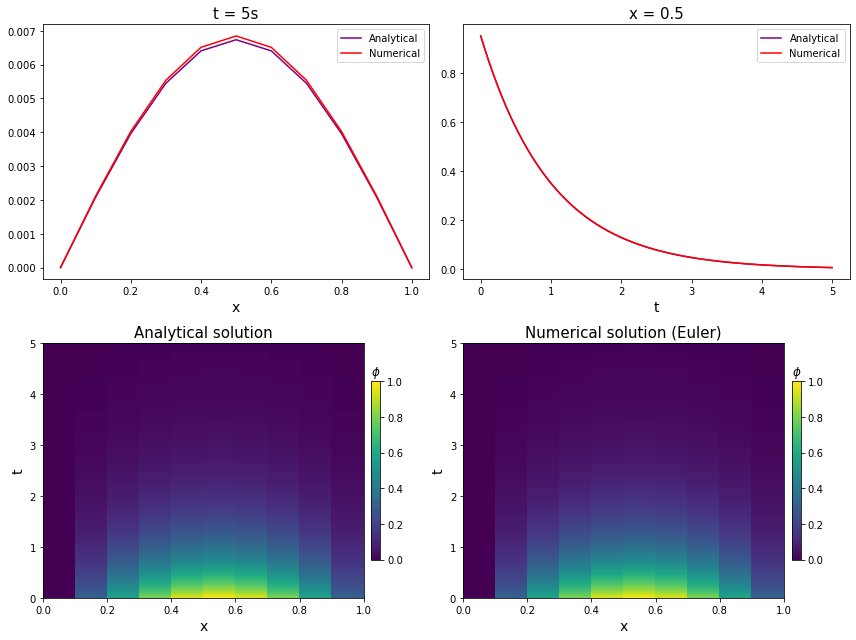

In [171]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))

axs[0,0].plot(x, phi_ana[:,-1], color='purple', label="Analytical")
axs[0,0].plot(x, phi_out.T[:,-1], color='red', label="Numerical")
axs[0,0].set_title('t = 5s', fontsize= 15)
axs[0,0].set(xlabel='x'), axs[0,0].xaxis.label.set_size(14)
axs[0,0].legend()

axs[0,1].plot(t, phi_ana[4,:], color='purple', label="Analytical")
axs[0,1].plot(t, phi_out.T[4,:], color='red', label="Numerical")
axs[0,1].set_title('x = 0.5', fontsize= 15)
axs[0,1].set(xlabel='t'), axs[0,1].xaxis.label.set_size(14)
axs[0,1].legend()

map1 = axs[1,0].pcolormesh(meshx, mesht, phi_ana)
axs[1,0].set_title('Analytical solution', fontsize= 15)
plt.colorbar(map1, pad=0.02, shrink=0.7, ax=axs[1,0]).ax.set_title('$\phi$', loc='left')
axs[1,0].set(xlabel='x', ylabel='t'), axs[1,0].xaxis.label.set_size(14), axs[1,0].yaxis.label.set_size(14)

map2 = axs[1,1].pcolormesh(meshx, mesht, phi_out.T)
axs[1,1].set_title('Numerical solution (Euler)', fontsize= 15)
plt.colorbar(map2, pad=0.02, shrink=0.7, ax=axs[1,1]).ax.set_title('$\phi$', loc='left')
axs[1,1].set(xlabel='x', ylabel='t'), axs[1,1].xaxis.label.set_size(14), axs[1,1].yaxis.label.set_size(14)
  
plt.tight_layout()

/opt/tljh/user/envs/ws20climnum/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


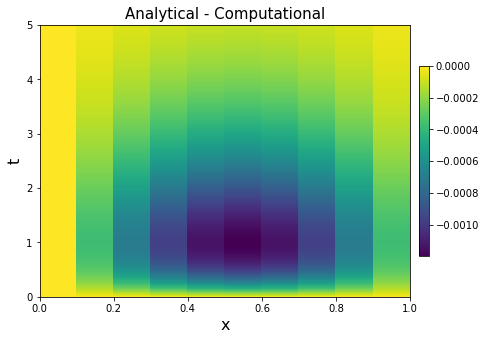

In [168]:
map3 = plt.pcolormesh(meshx, mesht, phi_ana - phi_out.T)
plt.gca().set_title('Analytical - Computational', fontsize= 15)
plt.gca().set_xlabel("x", fontsize = 16)
plt.gca().set_ylabel("t", fontsize = 16)
plt.colorbar(map3, pad=0.02, shrink=0.7)
plt.gcf().set_size_inches(8., 5.)

The analytical and the computational solution (using Euler scheme) behave very similarly in the spatial and time domain. Both present a similar exponential decay and have similar signal values. When taking the difference between the solutions, we observe the analytical solution decays faster than the numerical solution.